# Informacion basica pero necesaria para entender las variables del dataset. Para mas informacion sobre el dataset https://www.kaggle.com/competitions/titanic/data

In [1]:
#=
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
=#

 # Para mayor información sobre los paquetes de Julia o documentacion tenemos disponible la pagina oficial de julia en el siguiente link: https://julialang.org/

# Cargamos los paquetes necesarios

In [2]:
using CSV
using Pkg
using DataFrames
using PyCall
using Plots
using Statistics
using StatsPlots
using ScikitLearn
using BenchmarkTools

In [3]:
#= 
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("PyCall")
Pkg.add("Plots")
Pkg.add("Statistics")
Pkg.add("ScikitLearn")
=#

# Julia, haciendo uso de ?, nos brinda información y documentación util de esta manera aveces no es necesario siquiera salir del entorno de programacion a buscar algo

# Paquete Benchmark

In [4]:
? BenchmarkTools

search: BenchmarkTools @benchmarkset



No docstring found for module `BenchmarkTools`.

# Exported names

`@ballocated`, `@belapsed`, `@benchmark`, `@benchmarkable`, `@benchmarkset`, `@bprofile`, `@btime`, `@case`, `@tagged`, `BenchmarkGroup`, `addgroup!`, `allocs`, `clear_empty!`, `gctime`, `improvements`, `invariants`, `isimprovement`, `isinvariant`, `isregression`, `judge`, `loadparams!`, `mean`, `median`, `memory`, `params`, `ratio`, `regressions`, `rmskew`, `rmskew!`, `std`, `trim`, `tune!`, `var`, `warmup`

# Displaying contents of readme found at `C:\Users\LUCAS\.julia\packages\BenchmarkTools\QNsku\README.md`

# BenchmarkTools.jl

<picture> <source media="(prefers-color-scheme: dark)" srcset="docs/src/assets/logo-dark.svg" width="100" height="100" align="right"> <img alt="BenchmarkTools logo" src="docs/src/assets/logo.svg" width="100" height="100" align="right"> </picture>

[![][docs-stable-img]][docs-stable-url] [![][docs-dev-img]][docs-dev-url] [![Build Status](https://github.com/JuliaCI/BenchmarkTools.jl/workflows/CI/badge.svg)](https://github.com/JuliaCI/BenchmarkTools.jl/actions/workflows/CI.yml?query=branch%3Amaster) [![Code Coverage](https://codecov.io/gh/JuliaCI/BenchmarkTools.jl/branch/master/graph/badge.svg?label=codecov&token=ccN7NZpkBx)](https://codecov.io/gh/JuliaCI/BenchmarkTools.jl) [![Code Style: Blue](https://img.shields.io/badge/code%20style-blue-4495d1.svg)](https://github.com/invenia/BlueStyle) [![Aqua QA](https://raw.githubusercontent.com/JuliaTesting/Aqua.jl/master/badge.svg)](https://github.com/JuliaTesting/Aqua.jl)

BenchmarkTools makes **performance tracking of Julia code easy** by supplying a framework for **writing and running groups of benchmarks** as well as **comparing benchmark results**.

This package is used to write and run the benchmarks found in [BaseBenchmarks.jl](https://github.com/JuliaCI/BaseBenchmarks.jl).

The CI infrastructure for automated performance testing of the Julia language is not in this package, but can be found in [Nanosoldier.jl](https://github.com/JuliaCI/Nanosoldier.jl).

## Installation

<p> BenchmarkTools is a &nbsp;     <a href="https://julialang.org">         <img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia.ico" width="16em">         Julia Language     </a>     &nbsp; package. To install BenchmarkTools,     please <a href="https://docs.julialang.org/en/v1/manual/getting-started/">open     Julia's interactive session (known as REPL)</a> and press <kbd>]</kbd> key in the REPL to use the package mode, then type the following command </p>

```julia
pkg> add BenchmarkTools
```

## Documentation

If you're just getting started, check out the [manual](https://juliaci.github.io/BenchmarkTools.jl/dev/manual/) for a thorough explanation of BenchmarkTools.

If you want to explore the BenchmarkTools API, see the [reference document](https://juliaci.github.io/BenchmarkTools.jl/dev/reference/).

If you want a short example of a toy benchmark suite, see the sample file in this repo ([benchmark/benchmarks.jl](benchmark/benchmarks.jl)).

If you want an extensive example of a benchmark suite being used in the real world, you can look at the source code of [BaseBenchmarks.jl](https://github.com/JuliaCI/BaseBenchmarks.jl/tree/nanosoldier).

If you're benchmarking on Linux, I wrote up a series of [tips and tricks](https://juliaci.github.io/BenchmarkTools.jl/dev/linuxtips/) to help eliminate noise during performance tests.

## Quick Start

The primary macro provided by BenchmarkTools is `@benchmark`:

```julia
julia> using BenchmarkTools

# The `setup` expression is run once per sample, and is not included in the
# timing results. Note that each sample can require multiple evaluations
# benchmark kernel evaluations. See the BenchmarkTools manual for details.
julia> @benchmark sort(data) setup=(data=rand(10))
BenchmarkTools.Trial: 10000 samples with 972 evaluations.
 Range (min … max):  69.399 ns …  1.066 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     83.850 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   89.471 ns ± 53.666 ns  ┊ GC (mean ± σ):  3.25% ± 5.16%

          ▁▄▇█▇▆▃▁                                                 
  ▂▁▁▂▂▃▄▆████████▆▅▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂
  69.4 ns           Histogram: frequency by time             145 ns (top 1%)

 Memory estimate: 160 bytes, allocs estimate: 1.
```

For quick sanity checks, one can use the [`@btime` macro](https://juliaci.github.io/BenchmarkTools.jl/stable/manual/#Benchmarking-basics), which is a convenience wrapper around `@benchmark` whose output is analogous to Julia's built-in [`@time` macro](https://docs.julialang.org/en/v1/base/base/#Base.@time):

```julia
# The `seconds` expression helps set a rough time budget, see Manual for more explanation
julia> @btime sin(x) setup=(x=rand()) seconds=3
  4.361 ns (0 allocations: 0 bytes)
0.49587200950472454
```

If the expression you want to benchmark depends on external variables, you should use [`$` to "interpolate"](https://juliaci.github.io/BenchmarkTools.jl/stable/manual/#Interpolating-values-into-benchmark-expressions) them into the benchmark expression to [avoid the problems of benchmarking with globals](https://docs.julialang.org/en/v1/manual/performance-tips/#Avoid-global-variables). Essentially, any interpolated variable `$x` or expression `$(...)` is "pre-computed" before benchmarking begins:

```julia
julia> A = rand(3,3);

julia> @btime inv($A);            # we interpolate the global variable A with $A
  1.191 μs (10 allocations: 2.31 KiB)

julia> @btime inv($(rand(3,3)));  # interpolation: the rand(3,3) call occurs before benchmarking
  1.192 μs (10 allocations: 2.31 KiB)

julia> @btime inv(rand(3,3));     # the rand(3,3) call is included in the benchmark time
  1.295 μs (11 allocations: 2.47 KiB)
```

Sometimes, interpolating variables into very simple expressions can give the compiler more information than you intended, causing it to "cheat" the benchmark by hoisting the calculation out of the benchmark code

```julia
julia> a = 1; b = 2
2

julia> @btime $a + $b
  0.024 ns (0 allocations: 0 bytes)
3
```

As a rule of thumb, if a benchmark reports that it took less than a nanosecond to perform, this hoisting probably occurred. You can avoid this by referencing and dereferencing the interpolated variables 

```julia
julia> @btime $(Ref(a))[] + $(Ref(b))[]
  1.277 ns (0 allocations: 0 bytes)
3
```

As described in the [manual](https://juliaci.github.io/BenchmarkTools.jl/dev/manual/), the BenchmarkTools package supports many other features, both for additional output and for more fine-grained control over the benchmarking process.

## Why does this package exist?

Our story begins with two packages, "Benchmarks" and "BenchmarkTrackers". The Benchmarks package implemented an execution strategy for collecting and summarizing individual benchmark results, while BenchmarkTrackers implemented a framework for organizing, running, and determining regressions of groups of benchmarks. Under the hood, BenchmarkTrackers relied on Benchmarks for actual benchmark execution.

For a while, the Benchmarks + BenchmarkTrackers system was used for automated performance testing of Julia's Base library. It soon became apparent that the system suffered from a variety of issues:

1. Individual sample noise could significantly change the execution strategy used to collect further samples.
2. The estimates used to characterize benchmark results and to detect regressions were statistically vulnerable to noise (i.e. not robust).
3. Different benchmarks have different noise tolerances, but there was no way to tune this parameter on a per-benchmark basis.
4. Running benchmarks took a long time - an order of magnitude longer than theoretically necessary for many functions.
5. Using the system in the REPL (for example, to reproduce regressions locally) was often cumbersome.

The BenchmarkTools package is a response to these issues, designed by examining user reports and the benchmark data generated by the old system. BenchmarkTools offers the following solutions to the corresponding issues above:

1. Benchmark execution parameters are configured separately from the execution of the benchmark itself. This means that subsequent experiments are performed more consistently, avoiding branching "substrategies" based on small numbers of samples.
2. A variety of simple estimators are supported, and the user can pick which one to use for regression detection.
3. Noise tolerance has been made a per-benchmark configuration parameter.
4. Benchmark configuration parameters can be easily cached and reloaded, significantly reducing benchmark execution time.
5. The API is simpler, more transparent, and overall easier to use.

## Acknowledgements

This package was authored primarily by Jarrett Revels (@jrevels). Additionally, I'd like to thank the following people:

  * John Myles White, for authoring the original Benchmarks package, which greatly inspired BenchmarkTools
  * Andreas Noack, for statistics help and investigating weird benchmark time distributions
  * Oscar Blumberg, for discussions on noise robustness
  * Jiahao Chen, for discussions on error analysis

[docs-dev-img]: https://img.shields.io/badge/docs-dev-blue.svg [docs-dev-url]: https://JuliaCI.github.io/BenchmarkTools.jl/dev/ [docs-stable-img]: https://img.shields.io/badge/docs-stable-blue.svg [docs-stable-url]: https://JuliaCI.github.io/BenchmarkTools.jl/stable


# Paquete DataFrames

In [5]:
? DataFrames

search: DataFrames DataFrameColSelector DataFrame DataFrameRow DataFrameMapper



No docstring found for module `DataFrames`.

# Exported names

`AbstractDataFrame`, `All`, `AsTable`, `Between`, `ByRow`, `Cols`, `DataFrame`, `DataFrameRow`, `GroupedDataFrame`, `InvertedIndex`, `InvertedIndices`, `Missing`, `MissingException`, `Missings`, `Not`, `PrettyTables`, `SubDataFrame`, `Tables`, `aggregate`, `allcombinations`, `allowmissing`, `allowmissing!`, `antijoin`, `by`, `coalesce`, `colmetadata`, `colmetadata!`, `colmetadatakeys`, `columnindex`, `combine`, `completecases`, `crossjoin`, `delete!`, `deletecolmetadata!`, `deletemetadata!`, `describe`, `disallowmissing`, `disallowmissing!`, `dropmissing`, `dropmissing!`, `emptycolmetadata!`, `emptymetadata!`, `emptymissing`, `fillcombinations`, `flatten`, `groupby`, `groupcols`, `groupindices`, `innerjoin`, `insertcols`, `insertcols!`, `ismissing`, `leftjoin`, `leftjoin!`, `levels`, `mapcols`, `mapcols!`, `metadata`, `metadata!`, `metadatakeys`, `missing`, `missings`, `missingsmallest`, `ncol`, `nonmissingtype`, `nonunique`, `nrow`, `order`, `outerjoin`, `passmissing`, `proprow`, `rename`, `rename!`, `repeat!`, `rightjoin`, `rownumber`, `select`, `select!`, `semijoin`, `skipmissings`, `subset`, `subset!`, `transform`, `transform!`, `unique!`, `unstack`, `valuecols`

# Displaying contents of readme found at `C:\Users\LUCAS\.julia\packages\DataFrames\58MUJ\README.md`

# DataFrames.jl

[![Coverage Status](http://codecov.io/github/JuliaData/DataFrames.jl/coverage.svg?branch=main)](http://codecov.io/github/JuliaData/DataFrames.jl?branch=main) [![CI Testing](https://github.com/JuliaData/DataFrames.jl/workflows/CI/badge.svg)](https://github.com/JuliaData/DataFrames.jl/actions?query=workflow%3ACI+branch%3Amain) [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.7632427.svg)](https://doi.org/10.5281/zenodo.7632427)

Tools for working with tabular data in Julia.

**Installation**: at the Julia REPL, `using Pkg; Pkg.add("DataFrames")`

**Documentation**: [![][docs-stable-img]][docs-stable-url] [![][docs-latest-img]][docs-latest-url]

**Reporting Issues and Contributing**: See [CONTRIBUTING.md](CONTRIBUTING.md)

[![ColPrac: Contributor's Guide on Collaborative Practices for Community Packages](https://img.shields.io/badge/ColPrac-Contributor's%20Guide-blueviolet)](https://github.com/SciML/ColPrac)

**Maintenance**: DataFrames is maintained collectively by the [JuliaData collaborators](https://github.com/orgs/JuliaData/people). Responsiveness to pull requests and issues can vary, depending on the availability of key collaborators.

**Learning**: New to DataFrames.jl? Check out our [free Julia Academy course](https://juliaacademy.com/p/introduction-to-dataframes-jl) which will walk you through how to use DataFrames.jl. You can also check out [Bogumił Kamiński's DataFrames.jl tutorial](https://github.com/bkamins/Julia-DataFrames-Tutorial) that is available on GitHub.

[docs-latest-img]: https://img.shields.io/badge/docs-latest-blue.svg [docs-latest-url]: http://dataframes.juliadata.org/latest/

[docs-stable-img]: https://img.shields.io/badge/docs-stable-blue.svg [docs-stable-url]: http://dataframes.juliadata.org/stable/

**Citing**: For now, the best way of citing this package is using the [Zenodo link](https://doi.org/10.5281/zenodo.7632427).


# Paquete Plots

In [6]:
? Plots

search: Plots plots_heatmap plots_heatmap! StatsPlots plotlyjs unicodeplots



No docstring found for module `Plots`.

# Exported names

`@P_str`, `@animate`, `@colorant_str`, `@gif`, `@layout`, `@recipe`, `@series`, `@shorthands`, `@userplot`, `ABGR`, `ADIN99`, `ADIN99d`, `ADIN99o`, `AGray`, `AGray32`, `AHSI`, `AHSL`, `AHSV`, `ALCHab`, `ALCHuv`, `ALMS`, `ALab`, `ALuv`, `AOklab`, `AOklch`, `ARGB`, `ARGB32`, `AXYZ`, `AYCbCr`, `AYIQ`, `AbstractAGray`, `AbstractARGB`, `AbstractBackend`, `AbstractGray`, `AbstractGrayA`, `AbstractLayout`, `AbstractPlot`, `AbstractRGB`, `AbstractRGBA`, `AlphaColor`, `Animation`, `AxyY`, `BGR`, `BGRA`, `BezierCurve`, `CIE1931JV_CMF`, `CIE1931J_CMF`, `CIE1931_CMF`, `CIE1964_CMF`, `CIE2006_10_CMF`, `CIE2006_2_CMF`, `Color`, `Color3`, `ColorAlpha`, `ColorGradient`, `ColorPalette`, `ColorTypes`, `Colorant`, `ColorantNormed`, `Colors`, `DE_2000`, `DE_94`, `DE_AB`, `DE_BFD`, `DE_CMC`, `DE_DIN99`, `DE_DIN99d`, `DE_DIN99o`, `DE_JPC79`, `DIN99`, `DIN99A`, `DIN99d`, `DIN99dA`, `DIN99o`, `DIN99oA`, `Formatted`, `Fractional`, `GR`, `Gray`, `Gray24`, `GrayA`, `HSB`, `HSI`, `HSIA`, `HSL`, `HSLA`, `HSV`, `HSVA`, `KW`, `LCHab`, `LCHabA`, `LCHuv`, `LCHuvA`, `LMS`, `LMSA`, `Lab`, `LabA`, `Luv`, `LuvA`, `MSC`, `OHLC`, `Oklab`, `OklabA`, `Oklch`, `OklchA`, `PlotTheme`, `PlotThemes`, `PlotUtils`, `RGB`, `RGB24`, `RGBA`, `RGBX`, `RecipeData`, `RecipesBase`, `Segments`, `Shape`, `Surface`, `Transparent3`, `TransparentColor`, `TransparentGray`, `TransparentRGB`, `XRGB`, `XYZ`, `XYZA`, `YCbCr`, `YCbCrA`, `YIQ`, `YIQA`, `adapted_grid`, `add_theme`, `aliases`, `alpha`, `alphacolor`, `animate`, `annotate!`, `areaplot`, `areaplot!`, `arrow`, `attr!`, `backend`, `backend_name`, `backend_object`, `backends`, `bar`, `bar!`, `barh`, `barh!`, `barhist`, `barhist!`, `base_color_type`, `base_colorant_type`, `bbox`, `blue`, `boxplot`, `boxplot!`, `brush`, `ccolor`, `center`, `cgrad`, `chroma`, `cie_color_match`, `closeall`, `color`, `color_list`, `color_type`, `coloralpha`, `colordiff`, `colormap`, `colormatch`, `comp1`, `comp2`, `comp3`, `comp4`, `comp5`, `contour`, `contour!`, `contour3d`, `contour3d!`, `contourf`, `contourf!`, `coords`, `current`, `curve_points`, `curves`, `curves!`, `cvec`, `default`, `default_cgrad`, `density`, `density!`, `deuteranopic`, `distinguishable_colors`, `diverging_palette`, `font`, `frame`, `gamutmax`, `gamutmin`, `gaston`, `get_color_palette`, `gif`, `gr`, `gray`, `green`, `grid`, `gui`, `hdf5`, `heatmap`, `heatmap!`, `hex`, `hexbin`, `hexbin!`, `histogram`, `histogram!`, `histogram2d`, `histogram2d!`, `hline`, `hline!`, `hspan`, `hspan!`, `hue`, `inline`, `inspectdr`, `invisible`, `isdark`, `iter_segments`, `lens!`, `mapc`, `mapreducec`, `mesh3d`, `mesh3d!`, `mov`, `mp4`, `normalize_hue`, `ohlc`, `ohlc!`, `optimize_datetime_ticks`, `optimize_ticks`, `palette`, `parametric_colorant`, `path3d`, `path3d!`, `pgfplots`, `pgfplotsx`, `pie`, `pie!`, `plot`, `plot!`, `plot3d`, `plot3d!`, `plot_color`, `plotarea`, `plotattr`, `plotly`, `plotlyjs`, `plots_heatmap`, `plots_heatmap!`, `png`, `portfoliocomposition`, `portfoliocomposition!`, `protanopic`, `pyplot`, `pythonplot`, `quiver`, `quiver!`, `red`, `reducec`, `resetfontsizes`, `rgb_string`, `rgba_string`, `rotate`, `rotate!`, `savefig`, `scalefontsize`, `scalefontsizes`, `scatter`, `scatter!`, `scatter3d`, `scatter3d!`, `scatterhist`, `scatterhist!`, `sequential_palette`, `set_theme`, `shape_coords`, `showtheme`, `showtheme!`, `spy`, `spy!`, `stephist`, `stephist!`, `sticks`, `sticks!`, `stroke`, `surface`, `surface!`, `test_examples`, `text`, `theme`, `theme_palette`, `title!`, `translate`, `translate!`, `tritanopic`, `twinx`, `twiny`, `unicodeplots`, `violin`, `violin!`, `vline`, `vline!`, `vspan`, `vspan!`, `webm`, `weighted_color_mean`, `whitebalance`, `wireframe`, `wireframe!`, `with`, `wrap`, `xaxis!`, `xerror`, `xerror!`, `xflip!`, `xgrid!`, `xlabel!`, `xlims`, `xlims!`, `xticks`, `xticks!`, `xyY`, `xyYA`, `yaxis!`, `yerror`, `yerror!`, `yflip!`, `ygrid!`, `ylabel!`, `ylims`, `ylims!`, `yticks`, `yticks!`, `zaxis!`, `zerror`, `zerror!`, `zflip!`, `zgrid!`, `zlabel!`, `zlims`, `zlims!`, `zscale`, `zticks`, `zticks!`

# Displaying contents of readme found at `C:\Users\LUCAS\.julia\packages\Plots\ju9dp\README.md`

<a href="https://opencollective.com/plotsjl/donate" target="_blank">   <img src="https://opencollective.com/webpack/donate/button@2x.png?color=blue" width=200 /> </a>

# Plots

[gh-ci-img]: https://github.com/JuliaPlots/Plots.jl/workflows/ci/badge.svg?branch=master [gh-ci-url]: https://github.com/JuliaPlots/Plots.jl/actions?query=workflow%3Aci

[pkgeval-img]: https://juliaci.github.io/NanosoldierReports/pkgeval*badges/P/Plots.svg [pkgeval-url]: https://juliaci.github.io/NanosoldierReports/pkgeval*badges/report.html

[gitter-img]: https://badges.gitter.im/tbreloff/Plots.jl.svg [gitter-url]: https://gitter.im/tbreloff/Plots.jl?utm*source=badge&utm*medium=badge&utm*campaign=pr-badge&utm*content=badge

[docs-stable-img]: https://img.shields.io/badge/docs-stable-blue.svg [docs-stable-url]: https://docs.juliaplots.org/stable

[docs-dev-img]: https://img.shields.io/badge/docs-dev-blue.svg [docs-dev-url]: https://docs.juliaplots.org/dev

[![][gh-ci-img]][gh-ci-url] [![][pkgeval-img]][pkgeval-url] [![project chat](https://img.shields.io/badge/zulip-join_chat-brightgreen.svg)](https://julialang.zulipchat.com/#narrow/stream/236493-plots) [![][docs-stable-img]][docs-stable-url] [![][docs-dev-img]][docs-dev-url] [![Codecov](https://codecov.io/gh/JuliaPlots/Plots.jl/branch/master/graph/badge.svg)](https://codecov.io/gh/JuliaPlots/Plots.jl) [![Plots Downloads](https://shields.io/endpoint?url=https://pkgs.genieframework.com/api/v1/badge/Plots)](https://pkgs.genieframework.com?packages=Plots)

[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.4725317.svg)](https://doi.org/10.5281/zenodo.4725317) This is the DOI for all Versions, please follow the link to get the DOI for a specific version.

#### Created by Tom Breloff (@tbreloff)

#### Maintained by the [JuliaPlots members](https://github.com/orgs/JuliaPlots/people)

Plots is a plotting API and toolset.  My goals with the package are:

  * **Powerful**.  Do more with less.  Complex visualizations become easy.
  * **Intuitive**.  Stop reading so much documentation.  Commands should "just work".
  * **Concise**.  Less code means fewer mistakes and more efficient development/analysis.
  * **Flexible**.  Produce your favorite plots from your favorite package, but quicker and simpler.
  * **Consistent**.  Don't commit to one graphics package, use the same code everywhere.
  * **Lightweight**.  Very few dependencies.
  * **Smart**. Attempts to figure out what you **want** it to do... not just what you **tell** it.


# Exploración de datos, lectura y analisis del dataset 

In [7]:
titanic = CSV.read("titanic_train.csv", DataFrame, normalizenames = true);

Vemos cuanto tarda en leer el dataframe Julia

In [8]:
@btime CSV.read("titanic_train.csv", DataFrame, normalizenames = true);

  1.529 ms (4589 allocations: 409.21 KiB)


# Hacemos una copia para trabajar sobre la misma

In [9]:
titanic_cpy = copy(titanic);

In [10]:
typeof(titanic_cpy)

DataFrame

In [11]:
? DataFrame

search: DataFrame DataFrames DataFrameRow DataFrameMapper DataFrameColSelector



```
DataFrame <: AbstractDataFrame
```

An `AbstractDataFrame` that stores a set of named columns.

The columns are normally `AbstractVector`s stored in memory, particularly a `Vector`, `PooledVector` or `CategoricalVector`.

# Constructors

```julia
DataFrame(pairs::Pair...; makeunique::Bool=false, copycols::Bool=true)
DataFrame(pairs::AbstractVector{<:Pair}; makeunique::Bool=false, copycols::Bool=true)
DataFrame(ds::AbstractDict; copycols::Bool=true)
DataFrame(; kwargs..., copycols::Bool=true)

DataFrame(table; copycols::Union{Bool, Nothing}=nothing)
DataFrame(table, names::AbstractVector;
          makeunique::Bool=false, copycols::Union{Bool, Nothing}=nothing)
DataFrame(columns::AbstractVecOrMat, names::AbstractVector;
          makeunique::Bool=false, copycols::Bool=true)

DataFrame(::DataFrameRow; copycols::Bool=true)
DataFrame(::GroupedDataFrame; copycols::Bool=true, keepkeys::Bool=true)
```

# Keyword arguments

  * `copycols` : whether vectors passed as columns should be copied; by default set to `true` and the vectors are copied; if set to `false` then the constructor will still copy the passed columns if it is not possible to construct a `DataFrame` without materializing new columns. Note the `copycols=nothing` default in the Tables.jl compatible constructor; it is provided as certain input table types may have already made a copy of columns or the columns may otherwise be immutable, in which case columns are not copied by default. To force a copy in such cases, or to get mutable columns from an immutable input table (like `Arrow.Table`), pass `copycols=true` explicitly.
  * `makeunique` : if `false` (the default), an error will be raised

(note that not all constructors support these keyword arguments)

# Details on behavior of different constructors

It is allowed to pass a vector of `Pair`s, a list of `Pair`s as positional arguments, or a list of keyword arguments. In this case each pair is considered to represent a column name to column value mapping and column name must be a `Symbol` or string. Alternatively a dictionary can be passed to the constructor in which case its entries are considered to define the column name and column value pairs. If the dictionary is a `Dict` then column names will be sorted in the returned `DataFrame`.

In all the constructors described above column value can be a vector which is consumed as is or an object of any other type (except `AbstractArray`). In the latter case the passed value is automatically repeated to fill a new vector of the appropriate length. As a particular rule values stored in a `Ref` or a `0`-dimensional `AbstractArray` are unwrapped and treated in the same way.

It is also allowed to pass a vector of vectors or a matrix as as the first argument. In this case the second argument must be a vector of `Symbol`s or strings specifying column names, or the symbol `:auto` to generate column names `x1`, `x2`, ... automatically. Note that in this case if the first argument is a matrix and `copycols=false` the columns of the created `DataFrame` will be views of columns the source matrix.

If a single positional argument is passed to a `DataFrame` constructor then it is assumed to be of type that implements the [Tables.jl](https://github.com/JuliaData/Tables.jl) interface using which the returned `DataFrame` is materialized.

If two positional arguments are passed, where the second argument is an `AbstractVector`, then the first argument is taken to be a table as described in the previous paragraph, and columns names of the resulting data frame are taken from the vector passed as the second positional argument.

Finally it is allowed to construct a `DataFrame` from a `DataFrameRow` or a `GroupedDataFrame`. In the latter case the `keepkeys` keyword argument specifies whether the resulting `DataFrame` should contain the grouping columns of the passed `GroupedDataFrame` and the order of rows in the result follows the order of groups in the `GroupedDataFrame` passed.

# Notes

The `DataFrame` constructor by default copies all columns vectors passed to it. Pass the `copycols=false` keyword argument (where supported) to reuse vectors without copying them.

By default an error will be raised if duplicates in column names are found. Pass `makeunique=true` keyword argument (where supported) to accept duplicate names, in which case they will be suffixed with `_i` (`i` starting at 1 for the first duplicate).

If an `AbstractRange` is passed to a `DataFrame` constructor as a column it is always collected to a `Vector` (even if `copycols=false`). As a general rule `AbstractRange` values are always materialized to a `Vector` by all functions in DataFrames.jl before being stored in a `DataFrame`.

`DataFrame` can store only columns that use 1-based indexing. Attempting to store a vector using non-standard indexing raises an error.

The `DataFrame` type is designed to allow column types to vary and to be dynamically changed also after it is constructed. Therefore `DataFrame`s are not type stable. For performance-critical code that requires type-stability either use the functionality provided by `select`/`transform`/`combine` functions, use `Tables.columntable` and `Tables.namedtupleiterator` functions, use barrier functions, or provide type assertions to the variables that hold columns extracted from a `DataFrame`.

Metadata: this function preserves all table and column-level metadata. As a special case if a `GroupedDataFrame` is passed then only `:note`-style metadata from parent of the `GroupedDataFrame` is preserved.

# Examples

```jldoctest
julia> DataFrame((a=[1, 2], b=[3, 4])) # Tables.jl table constructor
2×2 DataFrame
 Row │ a      b
     │ Int64  Int64
─────┼──────────────
   1 │     1      3
   2 │     2      4

julia> DataFrame([(a=1, b=0), (a=2, b=0)]) # Tables.jl table constructor
2×2 DataFrame
 Row │ a      b
     │ Int64  Int64
─────┼──────────────
   1 │     1      0
   2 │     2      0

julia> DataFrame("a" => 1:2, "b" => 0) # Pair constructor
2×2 DataFrame
 Row │ a      b
     │ Int64  Int64
─────┼──────────────
   1 │     1      0
   2 │     2      0

julia> DataFrame([:a => 1:2, :b => 0]) # vector of Pairs constructor
2×2 DataFrame
 Row │ a      b
     │ Int64  Int64
─────┼──────────────
   1 │     1      0
   2 │     2      0

julia> DataFrame(Dict(:a => 1:2, :b => 0)) # dictionary constructor
2×2 DataFrame
 Row │ a      b
     │ Int64  Int64
─────┼──────────────
   1 │     1      0
   2 │     2      0

julia> DataFrame(a=1:2, b=0) # keyword argument constructor
2×2 DataFrame
 Row │ a      b
     │ Int64  Int64
─────┼──────────────
   1 │     1      0
   2 │     2      0

julia> DataFrame([[1, 2], [0, 0]], [:a, :b]) # vector of vectors constructor
2×2 DataFrame
 Row │ a      b
     │ Int64  Int64
─────┼──────────────
   1 │     1      0
   2 │     2      0

julia> DataFrame([1 0; 2 0], :auto) # matrix constructor
2×2 DataFrame
 Row │ x1     x2
     │ Int64  Int64
─────┼──────────────
   1 │     1      0
   2 │     2      0
```


In [12]:
first(titanic_cpy, 10)

10×12 DataFrame
 Row │ PassengerId  Survived  Pclass  Name                               Sex   ⋯
     │ Int64        Int64     Int64   String                             Strin ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │           1         0       3  Braund, Mr. Owen Harris            male  ⋯
   2 │           2         1       1  Cumings, Mrs. John Bradley (Flor…  femal
   3 │           3         1       3  Heikkinen, Miss. Laina             femal
   4 │           4         1       1  Futrelle, Mrs. Jacques Heath (Li…  femal
   5 │           5         0       3  Allen, Mr. William Henry           male  ⋯
   6 │           6         0       3  Moran, Mr. James                   male
   7 │           7         0       1  McCarthy, Mr. Timothy J            male
   8 │           8         0       3  Palsson, Master. Gosta Leonard     male
   9 │           9         1       3  Johnson, Mrs. Oscar W (Elisabeth…  femal ⋯
  10 │          10         1       2  Nasser, Mrs. Nicholas (Adele Ach…  femal
                                                               8 columns omitted

In [13]:
last(titanic_cpy, 10)

10×12 DataFrame
 Row │ PassengerId  Survived  Pclass  Name                               Sex   ⋯
     │ Int64        Int64     Int64   String                             Strin ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │         882         0       3  Markun, Mr. Johann                 male  ⋯
   2 │         883         0       3  Dahlberg, Miss. Gerda Ulrika       femal
   3 │         884         0       2  Banfield, Mr. Frederick James      male
   4 │         885         0       3  Sutehall, Mr. Henry Jr             male
   5 │         886         0       3  Rice, Mrs. William (Margaret Nor…  femal ⋯
   6 │         887         0       2  Montvila, Rev. Juozas              male
   7 │         888         1       1  Graham, Miss. Margaret Edith       femal
   8 │         889         0       3  Johnston, Miss. Catherine Helen …  femal
   9 │         890         1       1  Behr, Mr. Karl Howell              male  ⋯
  10 │         891         0       3  Dooley, Mr. Patrick                male
                                                               8 columns omitted

In [14]:
size(titanic_cpy)

(891, 12)

In [15]:
names(titanic_cpy)

12-element Vector{String}:
 "PassengerId"
 "Survived"
 "Pclass"
 "Name"
 "Sex"
 "Age"
 "SibSp"
 "Parch"
 "Ticket"
 "Fare"
 "Cabin"
 "Embarked"

# Creamos dos funciones en Julia similares a las de la libreria Pandas en Python para medir el uso de memoria y el tipo de variables

In [16]:
function dataframe_info(df::DataFrame)
    println(typeof(df))
    println("$(nrow(df)) entries, $(ncol(df)) columns")
    println("Data columns (total $(ncol(df)) columns):")
    for (col, dtype) in zip(names(df), eltype.(eachcol(df)))
        println("#   $(col)$(string(repeat(" ", 17-length(col))))$(count(!ismissing, df[!, col])) non-missing $(dtype)")
    end
end


dataframe_info (generic function with 1 method)

In [17]:
# Función para calcular el tamaño de un objeto en memoria
function sizeof_obj(obj)
    s = sizeof(obj)
    if typeof(obj) <: AbstractArray
        s += sum(sizeof, obj)  # Suma los tamaños de los elementos del arreglo
    end
    return s
end

sizeof_obj (generic function with 1 method)

In [18]:
function dataframe_memory_usage(df::DataFrame)
    total_size = 0
    for col in eachcol(df)
        total_size += sizeof_obj(col)
    end
    total_size = round(total_size / 1024, digits=3)
    println("El DataFrame ocupa aproximadamente $total_size KB de memoria.")
end

dataframe_memory_usage (generic function with 1 method)

In [19]:
dataframe_info(titanic_cpy)

DataFrame
891 entries, 12 columns
Data columns (total 12 columns):
#   PassengerId      891 non-missing Int64
#   Survived         891 non-missing Int64
#   Pclass           891 non-missing Int64
#   Name             891 non-missing String
#   Sex              891 non-missing String7
#   Age              714 non-missing Union{Missing, Float64}
#   SibSp            891 non-missing Int64
#   Parch            891 non-missing Int64
#   Ticket           891 non-missing String31
#   Fare             891 non-missing Float64
#   Cabin            204 non-missing Union{Missing, String15}
#   Embarked         889 non-missing Union{Missing, String1}


In [20]:
dataframe_memory_usage(titanic_cpy)

El DataFrame ocupa aproximadamente 165.982 KB de memoria.


 Con estas funciones estariamos haciendo algo similar al metodo .info() que se usa  en python con pandas pero Julia nos permite importar funciones de python
 

# Usando condas añadimos la libreria Pandas de Python

In [21]:
Pkg.add("Conda")
using Conda
Conda.add("pandas")

    Updating registry at `C:\Users\LUCAS\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\LUCAS\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\LUCAS\.julia\environments\v1.10\Manifest.toml`
[ Info: Running `conda install -y pandas` in root environment


Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done




==> WARNING: A newer version of conda exists. <==
    current version: 24.3.0
    latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda





## Package Plan ##

  environment location: C:\Users\LUCAS\.julia\conda\3\x86_64

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.6.2   |       h56e8100_0         153 KB  conda-forge
    openssl-3.3.1              |       h2466b09_0         8.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         8.1 MB

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2024.3.11-~ --> conda-forge::ca-certificates-2024.6.2-h56e8100_0 
  openssl                                  3.3.0-h2466b09_3 --> 3.3.1-h2466b09_0 



Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


# Importamos Pandas usando el paquete Pycall que ofrece Julia

In [22]:
pd = pyimport("pandas")

PyObject <module 'pandas' from 'C:\\Users\\LUCAS\\.julia\\conda\\3\\x86_64\\lib\\site-packages\\pandas\\__init__.py'>

In [23]:
titanic_df = pd.read_csv("titanic_train.csv", encoding="unicode_escape");

# Vemos que python usando pandas tarda mas en leer el dataframe que Julia 

In [24]:
@btime pd.read_csv("titanic_train.csv", encoding="unicode_escape")

  2.179 ms (16 allocations: 976 bytes)


PyObject      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]

In [25]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Obtenemos un resultado similar al de las funiones que creamos en Julia

#  Continuamos usando las funiones de Julia

In [26]:
titanic_cpy[!, :Age]

891-element Vector{Union{Missing, Float64}}:
 22.0
 38.0
 26.0
 35.0
 35.0
   missing
 54.0
  2.0
 27.0
 14.0
  4.0
 58.0
 20.0
  ⋮
 56.0
 25.0
 33.0
 22.0
 28.0
 25.0
 39.0
 27.0
 19.0
   missing
 26.0
 32.0

# Vemos que hay datos faltantes, asi que buscamos todas las columnas que tienen missing

In [27]:
describe(titanic_cpy)

12×7 DataFrame
 Row │ variable     mean      min                  median   max                ⋯
     │ Symbol       Union…    Any                  Union…   Any                ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ PassengerId  446.0     1                    446.0    891                ⋯
   2 │ Survived     0.383838  0                    0.0      1
   3 │ Pclass       2.30864   1                    3.0      3
   4 │ Name                   Abbing, Mr. Anthony           van Melkebeke, Mr.
   5 │ Sex                    female                        male               ⋯
   6 │ Age          29.6991   0.42                 28.0     80.0
   7 │ SibSp        0.523008  0                    0.0      8
   8 │ Parch        0.381594  0                    0.0      6
   9 │ Ticket                 110152                        WE/P 5735          ⋯
  10 │ Fare         32.2042   0.0                  14.4542  512.329
  11 │ Cabin                  A10                           T
  12 │ Embarked               C                             S
                                                               3 columns omitted

In [28]:
@btime describe(titanic_cpy);

  244.100 μs (287 allocations: 83.05 KiB)


# Tambien podemos hacer describe de una columna en especifico

In [29]:
describe(titanic_cpy, :all, cols=:Age)

1×16 DataFrame
 Row │ variable  mean     std      min      q25      median   q75      max     ⋯
     │ Symbol    Float64  Float64  Float64  Float64  Float64  Float64  Float64 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Age       29.6991  14.5265     0.42   20.125     28.0     38.0     80.0 ⋯
                                                               8 columns omitted

# Podemos ver que tenemos datos faltantes en la columna Age, Cabin y Embarked


In [30]:
columna_1 = :Age;
columna_2 = :Cabin;
columna_3 = :Embarked;

In [31]:
cantidad_faltantes_1 = count(x -> ismissing(x), titanic_cpy[!, columna_1])
cantidad_faltantes_2 = count(x -> ismissing(x), titanic_cpy[!, columna_2])
cantidad_faltantes_3 = count(x -> ismissing(x), titanic_cpy[!, columna_3])
total_faltantes = cantidad_faltantes_1 + cantidad_faltantes_2 + cantidad_faltantes_3

866

# Vemos el porecntaje de datos faltantes en cada columna

In [32]:
porcentaje_nulos_1 = cantidad_faltantes_1 / length(titanic_cpy[!, columna_1]) * 100;

In [33]:
porcentaje_nulos_2 = cantidad_faltantes_2 / length(titanic_cpy[!, columna_2]) * 100;

In [34]:
porcentaje_nulos_3 = cantidad_faltantes_3 / length(titanic_cpy[!, columna_3]) * 100;

# Vemos el porcentaje de valores nulos en todas las columnas del dataset

In [35]:
total_filas = nrow(titanic_cpy)
porcentaje_nulos = (col -> count(ismissing, col) / total_filas * 100).(eachcol(titanic_cpy))
null_percentage = DataFrame(variables = names(titanic), porcentaje = porcentaje_nulos)

12×2 DataFrame
 Row │ variables    porcentaje 
     │ String       Float64    
─────┼─────────────────────────
   1 │ PassengerId    0.0
   2 │ Survived       0.0
   3 │ Pclass         0.0
   4 │ Name           0.0
   5 │ Sex            0.0
   6 │ Age           19.8653
   7 │ SibSp          0.0
   8 │ Parch          0.0
   9 │ Ticket         0.0
  10 │ Fare           0.0
  11 │ Cabin         77.1044
  12 │ Embarked       0.224467

# Graficamos con barplot los porcentajes de nulos por varibles para una mejor visualización

# En Julia podemos crear funciones anonimas, en vez de estar escribiendo todo el codigo

In [36]:
@btime (col ->count(ismissing, col))

  1.200 ns (0 allocations: 0 bytes)


#9 (generic function with 1 method)

In [37]:
@btime nrow(titanic_cpy);

  57.172 ns (2 allocations: 32 bytes)


# En Julia con el macro @which podemos saber que parametros puede recibir una funcion, esto es util por que hay funciones que pueden recibir un parametros de diferente manera pero dar el mismo resultado

In [38]:
@which nrow(titanic_cpy)

nrow(df::DataFrame)
     @ DataFrames C:\Users\LUCAS\.julia\packages\DataFrames\58MUJ\src\dataframe\dataframe.jl:465

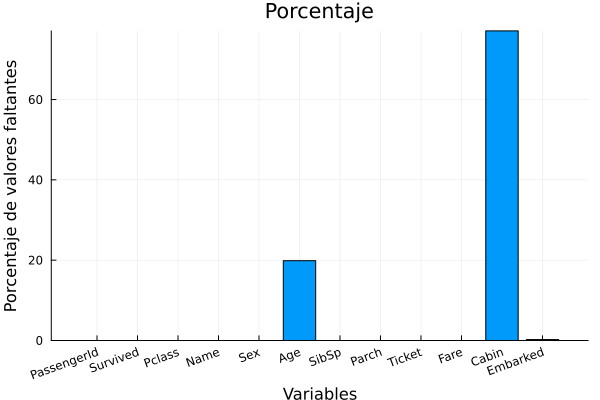

In [39]:
bar(null_percentage[:, 1], null_percentage[:, 2], 
    xlabel = "Variables", 
    ylabel = "Porcentaje de valores faltantes", 
    title = "Porcentaje",
    xrotation = 20 , 
    legend = false) 

# Como vemos que cabin tiene un alto porcentaje de nulos decidimos eliminar esta columna ya que tampoco la consideramos relevante para el analsis.

In [40]:
select!(titanic_cpy, Not(:Cabin))
mean_age = mean(skipmissing(titanic_cpy.Age))
titanic_cpy.Age .= coalesce.(titanic_cpy.Age, mean_age)
titanic_cpy = filter(row -> !ismissing(row.Embarked), titanic_cpy);

In [41]:
size(titanic_cpy)

(889, 11)

# Chequeamos que efectivamente ya no haya valores faltantes

In [42]:
total_filas = nrow(titanic_cpy)
porcentaje_nulos = (col -> count(ismissing, col) / total_filas * 100).(eachcol(titanic_cpy))
null_percentage = DataFrame(variables = names(titanic_cpy), porcentaje = porcentaje_nulos)

11×2 DataFrame
 Row │ variables    porcentaje 
     │ String       Float64    
─────┼─────────────────────────
   1 │ PassengerId         0.0
   2 │ Survived            0.0
   3 │ Pclass              0.0
   4 │ Name                0.0
   5 │ Sex                 0.0
   6 │ Age                 0.0
   7 │ SibSp               0.0
   8 │ Parch               0.0
   9 │ Ticket              0.0
  10 │ Fare                0.0
  11 │ Embarked            0.0

# Vemos que valores tiene cada columna

In [43]:
unique(titanic_cpy[:, :PassengerId])

889-element Vector{Int64}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
  13
   ⋮
 880
 881
 882
 883
 884
 885
 886
 887
 888
 889
 890
 891

In [44]:
unique(titanic_cpy[:, :Survived])

2-element Vector{Int64}:
 0
 1

In [45]:
unique(titanic_cpy[:, :Pclass])

3-element Vector{Int64}:
 3
 1
 2

# Para mejorar el entrenamiento de los algoritmos, usamos 0 para "male" y 1 para "female"

In [46]:
unique(titanic_cpy[:, :Sex])

2-element Vector{String7}:
 "male"
 "female"

In [47]:
titanic_cpy.Sex = map(x -> x == "male" ? 0 : x, titanic_cpy.Sex)
titanic_cpy.Sex = map(x -> x == "female" ? 1 : x, titanic_cpy.Sex);

In [48]:
unique(titanic_cpy[:, :Sex])

2-element Vector{Int64}:
 0
 1

In [49]:
unique(titanic_cpy[:, :Age])

89-element Vector{Float64}:
 22.0
 38.0
 26.0
 35.0
 29.69911764705882
 54.0
  2.0
 27.0
 14.0
  4.0
 58.0
 20.0
 39.0
  ⋮
  0.75
 53.0
 57.0
 80.0
 70.0
 24.5
  6.0
  0.67
 30.5
  0.42
 34.5
 74.0

# Redondeamos las edades para que no sean flotantes

In [50]:
titanic_cpy.Age = round.(titanic_cpy.Age, RoundNearest);

In [52]:
unique(titanic_cpy[:, :SibSp])

7-element Vector{Int64}:
 1
 0
 3
 4
 2
 5
 8

In [53]:
unique(titanic_cpy[:, :Parch])

7-element Vector{Int64}:
 0
 1
 2
 5
 3
 4
 6

In [54]:
unique(titanic_cpy[:, :Ticket])

680-element Vector{String31}:
 "A/5 21171"
 "PC 17599"
 "STON/O2. 3101282"
 "113803"
 "373450"
 "330877"
 "17463"
 "349909"
 "347742"
 "237736"
 "PP 9549"
 "113783"
 "A/5. 2151"
 ⋮
 "345765"
 "2667"
 "349212"
 "349217"
 "349257"
 "7552"
 "C.A./SOTON 34068"
 "SOTON/OQ 392076"
 "211536"
 "112053"
 "111369"
 "370376"

In [55]:
unique(titanic_cpy[:, :Fare])

247-element Vector{Float64}:
  7.25
 71.2833
  7.925
 53.1
  8.05
  8.4583
 51.8625
 21.075
 11.1333
 30.0708
 16.7
 26.55
 31.275
  ⋮
 37.0042
  6.45
  6.95
  8.3
  6.4375
 39.4
 14.1083
 13.8583
 50.4958
  5.0
  9.8458
 10.5167

In [56]:
unique(titanic_cpy[:, :Embarked])

3-element Vector{Union{Missing, String1}}:
 "S"
 "C"
 "Q"

# S, C y Q son valores que los algortimos de predicción no entienden a lo hora de ser entrenados por lo que los encodeamos con variables dummy

In [57]:
#Tomammos los valores de la columna Embarked
ux = unique(titanic_cpy.Embarked)
#aca se crean las columnas dummies y se les pone los valores 0 o 1
for val in ux
    titanic_cpy[!, Symbol("Embarked_$val")] = Int.(titanic_cpy.Embarked .== val)
end

#borramos embarked para usar las dummies
select!(titanic_cpy, Not(:Embarked))

889×13 DataFrame
 Row │ PassengerId  Survived  Pclass  Name                               Sex   ⋯
     │ Int64        Int64     Int64   String                             Int64 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │           1         0       3  Braund, Mr. Owen Harris                0 ⋯
   2 │           2         1       1  Cumings, Mrs. John Bradley (Flor…      1
   3 │           3         1       3  Heikkinen, Miss. Laina                 1
   4 │           4         1       1  Futrelle, Mrs. Jacques Heath (Li…      1
   5 │           5         0       3  Allen, Mr. William Henry               0 ⋯
   6 │           6         0       3  Moran, Mr. James                       0
   7 │           7         0       1  McCarthy, Mr. Timothy J                0
   8 │           8         0       3  Palsson, Master. Gosta Leonard         0
   9 │           9         1       3  Johnson, Mrs. Oscar W (Elisabeth…      1 ⋯
  10 │          10         1       2  Nasser, Mrs. Nicholas (Adele Ach…      1
  11 │          11         1       3  Sandstrom, Miss. Marguerite Rut        1
  ⋮  │      ⋮          ⋮        ⋮                     ⋮                    ⋮   ⋱
 880 │         882         0       3  Markun, Mr. Johann                     0
 881 │         883         0       3  Dahlberg, Miss. Gerda Ulrika           1 ⋯
 882 │         884         0       2  Banfield, Mr. Frederick James          0
 883 │         885         0       3  Sutehall, Mr. Henry Jr                 0
 884 │         886         0       3  Rice, Mrs. William (Margaret Nor…      1
 885 │         887         0       2  Montvila, Rev. Juozas                  0 ⋯
 886 │         888         1       1  Graham, Miss. Margaret Edith           1
 887 │         889         0       3  Johnston, Miss. Catherine Helen …      1
 888 │         890         1       1  Behr, Mr. Karl Howell                  0
 889 │         891         0       3  Dooley, Mr. Patrick                    0 ⋯
                                                  8 columns and 868 rows omitted

# Graficamos haciendo uso de paquete Plots de Julia la distribucion de los valores de algunas columnas para tener una mejor compresión de las mismas

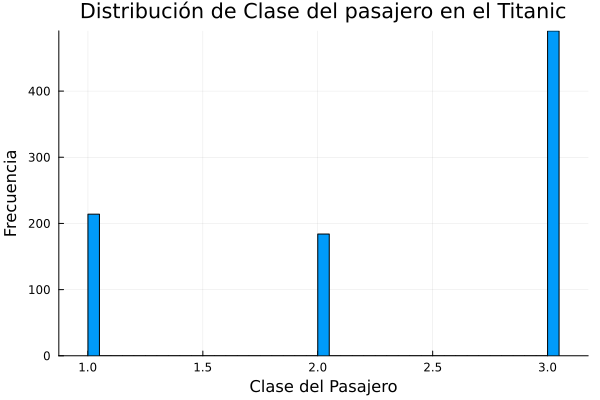

In [58]:
histogram(titanic_cpy.Pclass, bins=40, xlabel="Clase del Pasajero", ylabel="Frecuencia", 
    title="Distribución de Clase del pasajero en el Titanic", legend=false)


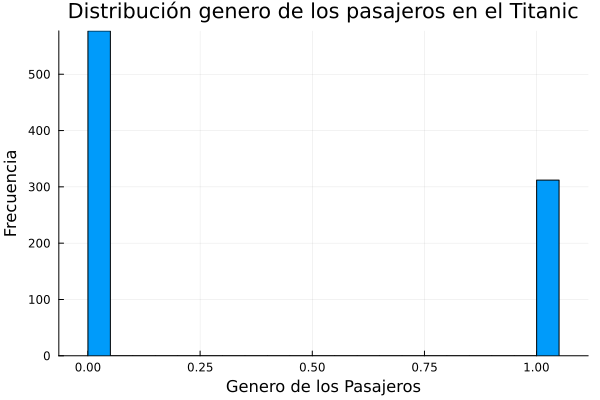

In [59]:
# recordar 0 male y 1 female
histogram(titanic_cpy.Sex, bins=40, xlabel="Genero de los Pasajeros", ylabel="Frecuencia", 
    title="Distribución genero de los pasajeros en el Titanic", legend=false)

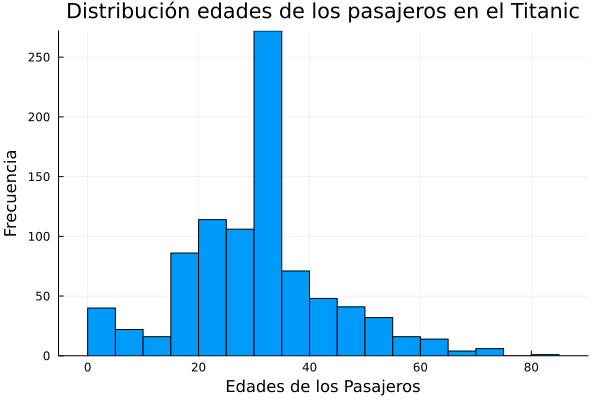

In [60]:
histogram(titanic_cpy.Age, bins=20, xlabel="Edades de los Pasajeros", ylabel="Frecuencia", 
    title="Distribución edades de los pasajeros en el Titanic", legend=false)

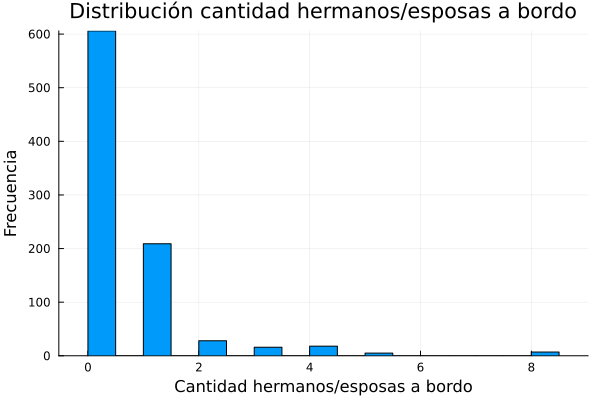

In [61]:
histogram(titanic_cpy.SibSp, bins=30, xlabel="Cantidad hermanos/esposas a bordo", ylabel="Frecuencia", 
    title="Distribución cantidad hermanos/esposas a bordo", legend=false)

# Otra forma de mostrar los graficos

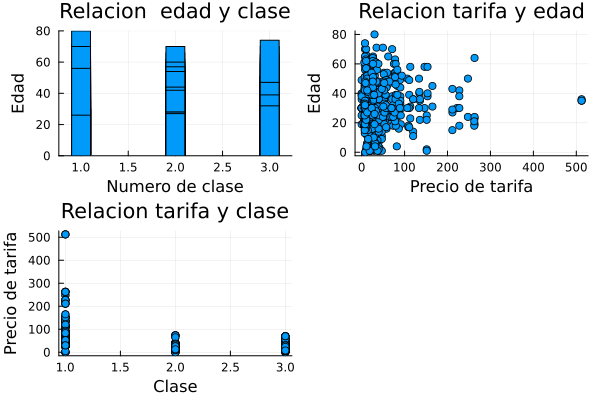

In [62]:
p1 = bar(titanic_cpy.Pclass, titanic_cpy.Age, xlabel="Numero de clase", ylabel="Edad", title="Relacion  edad y clase", bar_width=.2)
p2 = scatter(titanic_cpy.Fare , titanic_cpy.Age, xlabel="Precio de tarifa", ylabel="Edad", title="Relacion tarifa y edad")
p3 = scatter(titanic_cpy.Pclass, titanic_cpy.Fare , xlabel="Clase", ylabel="Precio de tarifa", title="Relacion tarifa y clase")

plot(p1,p2,p3,layout=(2,2),legend = false)

# Armamos la matriz de correlacion para ver que tan relacionadas estan las variables

In [63]:
correlation_matrix = cor(Matrix(titanic_cpy[:, Not(:Ticket, :Name, :PassengerId)]))
print(correlation_matrix)

[1.0 -0.3355488593568249 0.5415849155511688 -0.07517824043328243 -0.034039998796749 0.08315078366620238 0.25529046130469907 -0.15177704859433266 0.16996596681270007 0.004535728723985517; -0.3355488593568249 1.0 -0.12774090018841397 -0.3267201521354759 0.08165562134791371 0.016824493837764427 -0.5481932852366443 0.07646636442441157 -0.2457334259602066 0.22055803680888794; 0.5415849155511688 -0.12774090018841397 1.0 -0.08985542043163967 0.11634816941781727 0.24750798158570564 0.17995752694626224 -0.12140474914434239 0.08452047057907446 0.07521670605423188; -0.07517824043328243 -0.3267201521354759 -0.08985542043163967 1.0 -0.23150467584210013 -0.1793292206694928 0.08786682012100622 -0.023577968668080214 0.03412994084418173 -0.010049535436285466; -0.034039998796749 0.08165562134791371 0.11634816941781727 -0.23150467584210013 1.0 0.4145416380997264 0.16088685492565127 0.06943826444883341 -0.060073759845922975 -0.02669168244009547; 0.08315078366620238 0.016824493837764427 0.24750798158570564

In [64]:
df = DataFrame(correlation_matrix, [:Survived, :Pclass, :Sex, :Age, :SibSp, :Parch, :Fare, :Embarked_S, :Embarked_C, :Embarked_Q])

10×10 DataFrame
 Row │ Survived     Pclass      Sex         Age         SibSp       Parch      ⋯
     │ Float64      Float64     Float64     Float64     Float64     Float64    ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │  1.0         -0.335549    0.541585   -0.0751782  -0.03404     0.0831508 ⋯
   2 │ -0.335549     1.0        -0.127741   -0.32672     0.0816556   0.0168245
   3 │  0.541585    -0.127741    1.0        -0.0898554   0.116348    0.247508
   4 │ -0.0751782   -0.32672    -0.0898554   1.0        -0.231505   -0.179329
   5 │ -0.03404      0.0816556   0.116348   -0.231505    1.0         0.414542  ⋯
   6 │  0.0831508    0.0168245   0.247508   -0.179329    0.414542    1.0
   7 │  0.25529     -0.548193    0.179958    0.0878668   0.160887    0.217532
   8 │ -0.151777     0.0764664  -0.121405   -0.023578    0.0694383   0.0615116
   9 │  0.169966    -0.245733    0.0845205   0.0341299  -0.0600738  -0.0115884 ⋯
  10 │  0.00453573   0.220558    0.0752167  -0.0100495  -0.0266917  -0.0815851
                                                               4 columns omitted

# Lo representamos tambien en un mapa de calor

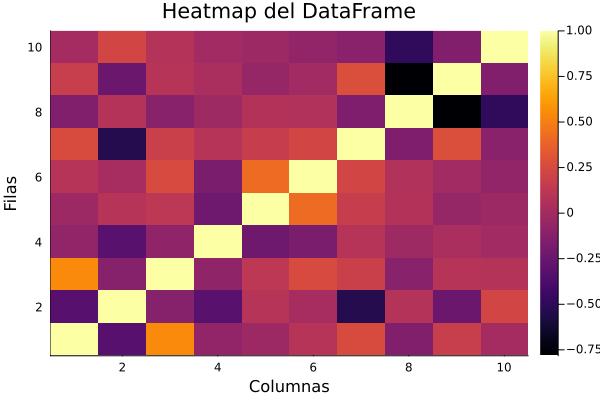

In [65]:
heatmap(correlation_matrix, xlabel="Columnas", ylabel="Filas", title="Heatmap del DataFrame")

# Le pregutanmos a Julia que es cor y para que sirve

In [66]:
? cor

search: cor Core corrplot corrplot! cornerplot cornerplot! correlation_matrix



```
cor(x::AbstractVector)
```

Return the number one.

---

```
cor(X::AbstractMatrix; dims::Int=1)
```

Compute the Pearson correlation matrix of the matrix `X` along the dimension `dims`.

---

```
cor(x::AbstractVector, y::AbstractVector)
```

Compute the Pearson correlation between the vectors `x` and `y`.

---

```
cor(X::AbstractVecOrMat, Y::AbstractVecOrMat; dims=1)
```

Compute the Pearson correlation between the vectors or matrices `X` and `Y` along the dimension `dims`.

---

```
cor(X, w::AbstractWeights, dims=1)
```

Compute the Pearson correlation matrix of `X` along the dimension `dims` with a weighting `w` .

---

```
cor(ce::CovarianceEstimator, x::AbstractVector, y::AbstractVector)
```

Compute the correlation of the vectors `x` and `y` using estimator `ce`.

---

```
cor(
    ce::CovarianceEstimator, X::AbstractMatrix, [w::AbstractWeights];
    mean=nothing, dims::Int=1
)
```

Compute the correlation matrix of the matrix `X` along dimension `dims` using estimator `ce`. A weighting vector `w` can be specified. The keyword argument `mean` can be:

  * `nothing` (default) in which case the mean is estimated and subtracted from the data `X`,
  * a precalculated mean in which case it is subtracted from the data `X`. Assuming `size(X)` is `(N,M)`, `mean` can either be:

      * when `dims=1`, an `AbstractMatrix` of size `(1,M)`,
      * when `dims=2`, an `AbstractVector` of length `N` or an `AbstractMatrix` of size `(N,1)`.

---

```
cor(d::MultivariateDistribution)
```

Computes the correlation matrix for distribution `d`.

---

```
cor(M::CCA)
```

The correlations of the projected components (a vector of length `p`).


# Armamos una tabla con uan dataframe para ver la correacion de Pearson entre las variables

# Dicha correlación nos permite determinar la fuerza y la dirección de la relación lineal entre dos variables cuantitativas

In [67]:
data = Matrix(titanic_cpy[:, Not(:Ticket, :Name, :PassengerId)])# pasamos el dataframe a una matriz

correlation_matrix = cor(data) # creamos la amtriz de correlacion
column_names = names(titanic_cpy[:, Not(:Ticket, :Name, :PassengerId)]) # nombres de las columnas que va a tener el dataframe 
df_correlation = DataFrame(var_1 = String[], vare_2 = String[], correlación_Pearson = Float64[])# dataframe con las correlaciones

for i in 1:length(column_names)
    for j in 1:length(column_names)
        if i != j
            push!(df_correlation, [column_names[i], column_names[j], correlation_matrix[i, j]])
        end
    end
end
sorted_corr = sort(df_correlation, :correlación_Pearson, rev=true)
first(sorted_corr, 10)


10×3 DataFrame
 Row │ var_1       vare_2      correlación_Pearson 
     │ String      String      Float64             
─────┼─────────────────────────────────────────────
   1 │ Survived    Sex                    0.541585
   2 │ Sex         Survived               0.541585
   3 │ SibSp       Parch                  0.414542
   4 │ Parch       SibSp                  0.414542
   5 │ Fare        Embarked_C             0.270731
   6 │ Embarked_C  Fare                   0.270731
   7 │ Survived    Fare                   0.25529
   8 │ Fare        Survived               0.25529
   9 │ Sex         Parch                  0.247508
  10 │ Parch       Sex                    0.247508

# Graficamos la relación entre algunas variables del dataset y el target que es Survived

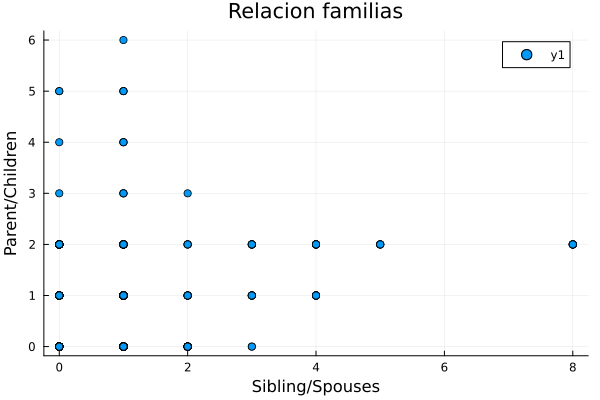

In [68]:
scatter(titanic_cpy.SibSp, titanic_cpy.Parch , xlabel="Sibling/Spouses", ylabel="Parent/Children", title="Relacion familias")


# Vemos cuantos pasajeros se salvan respecto a su clase

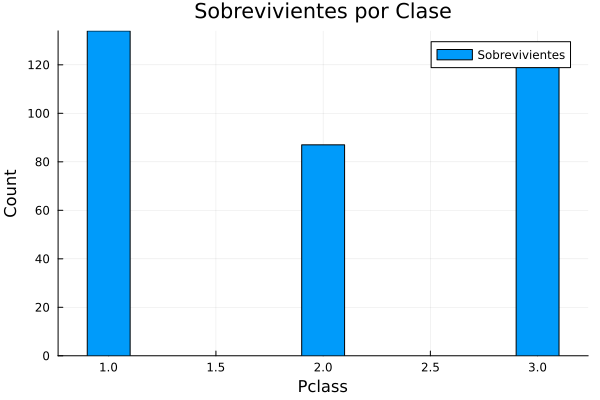

In [69]:

survival_counts = combine(groupby(titanic_cpy, :Pclass), :Survived => sum)
rename!(survival_counts, :Survived_sum => :Count)
bar(survival_counts.Pclass, survival_counts.Count,
    xlabel="Pclass", ylabel="Count",
    title="Sobrevivientes por Clase",
    label="Sobrevivientes", legend=:topright,
    bar_width=0.2
)

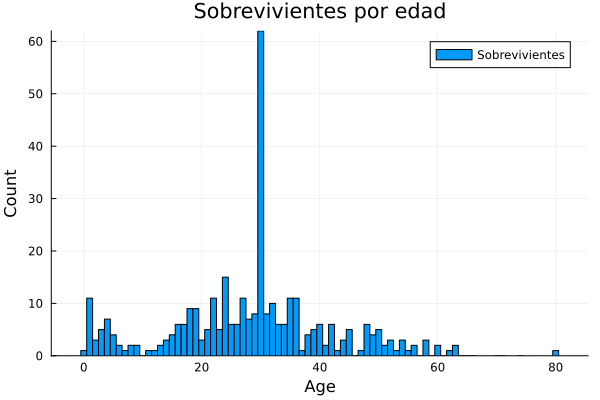

In [70]:
survival_counts = combine(groupby(titanic_cpy, :Age), :Survived => sum)
rename!(survival_counts, :Survived_sum => :Count)
bar(survival_counts.Age, survival_counts.Count,
    xlabel="Age", ylabel="Count",
    title="Sobrevivientes por edad",
    label="Sobrevivientes", legend=:topright,
    bar_width=1
)

# Recordemos que 0 son hombres y 1 mujeres

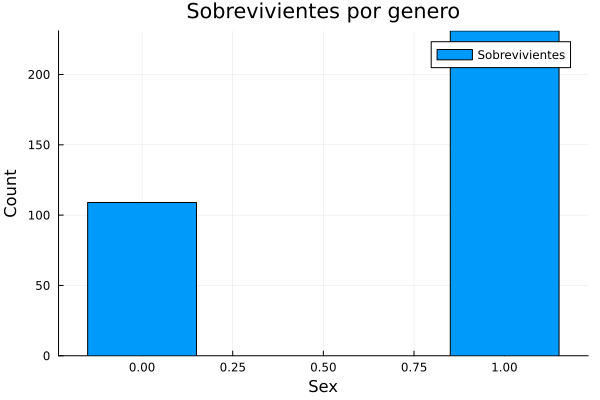

In [71]:
survival_counts = combine(groupby(titanic_cpy, :Sex), :Survived => sum)
rename!(survival_counts, :Survived_sum => :Count)
bar(survival_counts.Sex, survival_counts.Count,
    xlabel="Sex", ylabel="Count",
    title="Sobrevivientes por genero",
    label="Sobrevivientes", legend=:topright,
    bar_width=.3
)

# Logicamente como en la pelicula hay mas sobrevientes mujeres que hombres

# Haciendo uso de boxplot buscamos outliers, es decir valores por fuera de la norma

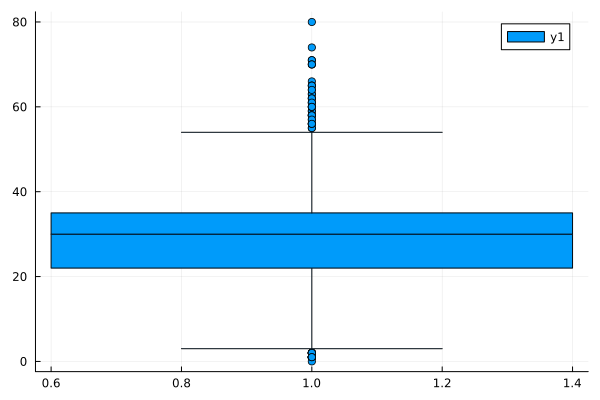

In [72]:
boxplot(titanic_cpy[!,:Age])

# Creemos que son valores normales para familiares abordo

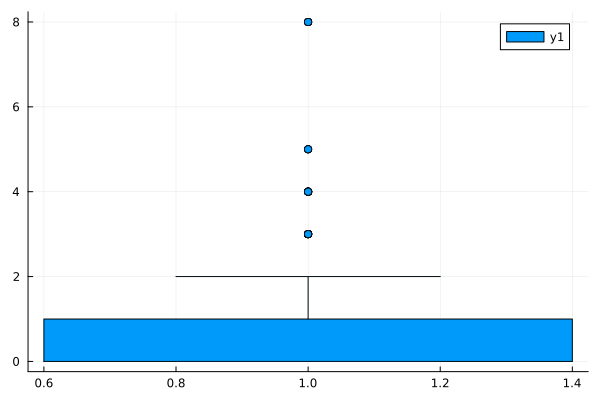

In [73]:
boxplot(titanic_cpy[!,:SibSp])

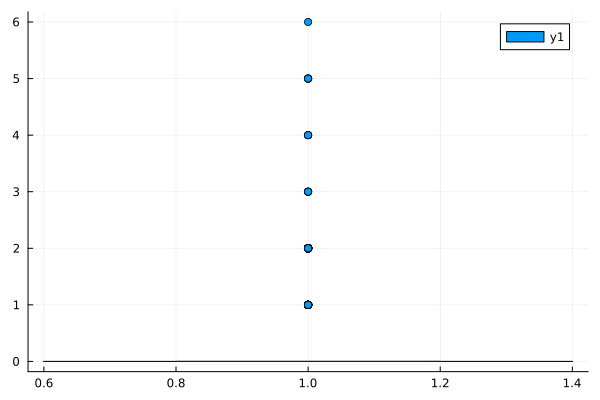

In [74]:
boxplot(titanic_cpy[!,:Parch])

# Vemos que son todos valores normales para una tarifa de pasajero

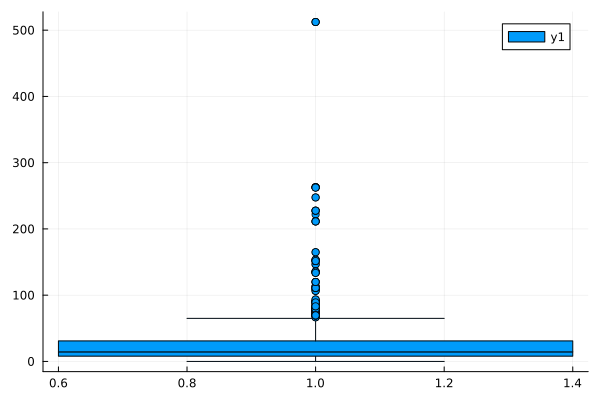

In [75]:
boxplot(titanic_cpy[!,:Fare])

# Luego de todo el trabajo sobre los datos vemos que no hay outliers

# Ahora vamos a armar nuestro split para tener la parte de entrenamiento y la de testeo

# No tomamos en cuenta la columna con los nombres, ni la cabina ni los tickets ya que no los consideramos relevantes para el analisis ademas como estos son datos en formato String afectan a los algoritmos de entrenamiento y encodearlos seria una locura ya que son muchos datos que representan un valor unico

# En x van los datos, todo menos lo que queremos predecir

In [76]:
titanic_x = Matrix(titanic_cpy[:, [1, 3, 5, 6, 7, 8, 10, 11, 12, 13]]);

# En y va lo que queremos predecir, nuestro target

In [77]:
titanic_y = Array(titanic_cpy[:, 2]);

# Creamos nuestro train split, con un 0.2 de porcentaje de testeo y un 0.8 de entrenamiento para el split

In [78]:
using ScikitLearn: CrossValidation
train_test_split = CrossValidation.train_test_split

train_test_split (generic function with 1 method)

In [79]:
x_train, x_test, y_train, y_test = train_test_split(titanic_x, titanic_y, test_size = .2, random_state = 10)

4-element Vector{Array}:
 [58.0 3.0 … 1.0 0.0; 718.0 2.0 … 0.0 0.0; … ; 127.0 3.0 … 0.0 1.0; 267.0 3.0 … 0.0 0.0]
 [636.0 2.0 … 0.0 0.0; 648.0 1.0 … 1.0 0.0; … ; 96.0 3.0 … 0.0 0.0; 235.0 2.0 … 0.0 0.0]
 [0, 1, 0, 0, 0, 0, 0, 0, 1, 0  …  1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [1, 1, 0, 1, 0, 0, 1, 1, 0, 1  …  0, 1, 0, 1, 1, 0, 0, 0, 0, 0]

# Con el macro @edit Julia nos muestra donde se implementa esta funcion y nos brinda información sobre la misma, evitandonos el trabajo de ir a buscarlo nosotros

In [80]:
@edit train_test_split(titanic_x, titanic_y, test_size = .2, random_state = 10) 

# Vemos como performa la funcion que genera el split en Julia

In [81]:
@benchmark train_test_split(titanic_x, titanic_y, test_size = .2, random_state = 10)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  407.700 μs …  12.443 ms  ┊ GC (min … max): 0.00% … 29.08%
 Time  (median):     435.400 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   452.655 μs ± 369.046 μs  ┊ GC (mean ± σ):  0.78% ±  0.92%

              ▁▅▇█▄▁                                             
  ▁▁▂▂▂▂▂▂▂▂▃▆██████▇▅▄▅▅▅▅▅▄▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  408 μs           Histogram: frequency by time          510 μs <

 Memory estimate: 84.84 KiB, allocs estimate: 182.

In [82]:
@btime train_test_split(titanic_x, titanic_y, test_size = .2, random_state = 10)

  407.100 μs (182 allocations: 84.84 KiB)


4-element Vector{Array}:
 [58.0 3.0 … 1.0 0.0; 718.0 2.0 … 0.0 0.0; … ; 127.0 3.0 … 0.0 1.0; 267.0 3.0 … 0.0 0.0]
 [636.0 2.0 … 0.0 0.0; 648.0 1.0 … 1.0 0.0; … ; 96.0 3.0 … 0.0 0.0; 235.0 2.0 … 0.0 0.0]
 [0, 1, 0, 0, 0, 0, 0, 0, 1, 0  …  1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [1, 1, 0, 1, 0, 0, 1, 1, 0, 1  …  0, 1, 0, 1, 1, 0, 0, 0, 0, 0]

# Armamos dataframes con los splits para luego poder guardarlos como CSV

In [83]:
columnas = [:PassengerId, :Pclass,:Sex, :Age, :SibSp, :Parch, :Fare, :Embarked_S, :Embarked_C, :Embarked_Q]
x_train_df = DataFrame(x_train, columnas )
y_train_df = DataFrame(Survived = y_train)
x_test_df = DataFrame(x_test, columnas )
y_test_df = DataFrame(Survived = y_test);

In [84]:
CSV.write("x_train.csv", x_train_df)
CSV.write("y_train.csv", y_train_df)
CSV.write("x_test.csv", x_test_df)
CSV.write("y_test.csv", y_test_df);

# Traemos un modelo simple, importandolo desde SK para hacer una prueba rapida de como rinde con el split de datos que creamos, vamos a medir esto con el score accuracy teniendo en cuenta que va de 0 a 1 siendo 1 el valor mas preciso en cuanto a la prediccion

In [85]:
@sk_import linear_model: LogisticRegression

PyObject <class 'sklearn.linear_model._logistic.LogisticRegression'>

In [86]:
log_reg_2 = LogisticRegression(max_iter=992)

PyObject LogisticRegression(max_iter=992)

In [87]:
fit!(log_reg_2, x_train, y_train)

PyObject LogisticRegression(max_iter=992)

In [88]:
predictions_log_reg = predict(log_reg_2, x_test);

# Trameos la metrica accuracy tambien de SK

In [89]:
@sk_import metrics: accuracy_score

PyObject <function accuracy_score at 0x000001A4BA74C0D0>

In [90]:
accuracy_log_reg = accuracy_score(predictions_log_reg, y_test)

0.8258426966292135

In [91]:
y_test_vec = vec(y_test)
predictions_log_reg = vec(predictions_log_reg);

# Medimos la performance del modelo

In [92]:
@btime LogisticRegression(max_iter=992) 

  3.913 μs (13 allocations: 832 bytes)


PyObject LogisticRegression(max_iter=992)

In [93]:
@benchmark predict(log_reg_2, x_test)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  92.000 μs … 515.500 μs  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     95.100 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   96.408 μs ±   9.377 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

    ▆▆▇█▅▁                                                      
  ▁▅██████▅▄▅▄▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  92 μs           Histogram: frequency by time          126 μs <

 Memory estimate: 2.94 KiB, allocs estimate: 34.

In [94]:
@btime fit!(log_reg_2, x_train, y_train)

  50.523 ms (18 allocations: 944 bytes)


PyObject LogisticRegression(max_iter=992)

In [95]:
@benchmark accuracy_score(predictions_log_reg, y_test)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  273.100 μs …  24.544 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     276.600 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   280.345 μs ± 242.821 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

      ▆█▆▅▁                                                      
  ▁▁▂██████▇▅▄▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  273 μs           Histogram: frequency by time          305 μs <

 Memory estimate: 528 bytes, allocs estimate: 13.

# Matriz de Confusion

In [96]:
using MLBase
MLBase.confusmat(2, Array{Int64, 1}(y_test .+ 1), Array{Int64, 1}(predictions_log_reg .+ 1))

2×2 Matrix{Int64}:
 102  13
  18  45

# Hacemos esto con python y comparamos los tiempos que tarda respecto a los de Julia

# Importamos el modelo desde Python

In [97]:
sklearn_linear_model = pyimport("sklearn.linear_model")
LogisticRegression = sklearn_linear_model.LogisticRegression

PyObject <class 'sklearn.linear_model._logistic.LogisticRegression'>

In [98]:
model = LogisticRegression(max_iter=992)
model.fit(x_train, y_train)

PyObject LogisticRegression(max_iter=992)

In [99]:
@btime model.fit(x_train, y_train)

  50.583 ms (15 allocations: 800 bytes)


PyObject LogisticRegression(max_iter=992)

In [100]:
@btime LogisticRegression(max_iter=992)

  3.913 μs (13 allocations: 832 bytes)


PyObject LogisticRegression(max_iter=992)

In [103]:
predict_model_py = model.predict(x_test);

In [104]:
accuracy_score(predict_model_py, y_test)

0.8258426966292135